In [1]:
import pandas as pd
import numpy as np
import sqlite3
import qrcode

import os

from id_generation.id_generation import generate_ids
from encryption.aes import encrypt_message, decrypt_message, generate_random_encryption_key

```mermaid
erDiagram
    Keys {
        string encrypted_id PK
        string encryption_key
        string uncrypted_id
        datetime date_added
    }
```

In [2]:
conn = sqlite3.connect(r"../data/database.sqlite")
cur = conn.cursor()

In [3]:
cur.execute("DROP TABLE IF EXISTS keys;")

cur.execute("""
CREATE TABLE keys (
    encrypted_id TEXT PRIMARY KEY,
    encryption_key TEXT NOT NULL,
    unencrypted_id TEXT NOT NULL,
    date_added DATETIME DEFAULT CURRENT_TIMESTAMP,
    is_redeemed BOOLEAN DEFAULT FALSE
);""")

In [4]:
unencrypted_ids = generate_ids(quantity=2002)
data_insertion = []
for unencrypted_id in unencrypted_ids:
    encryption_key = generate_random_encryption_key()
    encrypted_id = encrypt_message(unencrypted_id, encryption_key)

    data_insertion.append((
        encrypted_id,
        encryption_key,
        unencrypted_id
    ))

data_insertion

[('4ULdDFoRq7lJ82K3F2GOb+0cLmPfO32N0rpnK6A01Cw=',
  b's\xcfS)\x80\x9e\x8d\x1e\xca\xf4b#\xa7\x10[\xcb\x01\x94\xf5\xc6Q\xb5\xbf\x16\x12\xf1`\xfc\x19\xa8\x99\x1a',
  'MT_00001'),
 ('tXRtZrzLDItsOZOCcq4zRUAwSrxWuNOD0cz32PEgpEY=',
  b'\xf7pm\xce\xa8\xd6\xb6\xc8\xed\xc7[J2\xc8\xf5Q4\x99\xe6\xcf\x9c\xe1\xbb\xba\xc3\x14\xc0y\x12\x12\t\x97',
  'MT_00002'),
 ('SSPdFUHEnA7Q5QQgD3sq8la/+UtVYOJdmJkofC6g9xY=',
  b'\x7f\x9fq\xb1\r\x9f\x1c\x9d\x8a\x14\xb8\x1f2\x16\xc6\xa7F\xd6\x88\xbbg\x0c\xdc\xff\xf7P\x91X\xbex\xbf\xfd',
  'MT_00003'),
 ('dpI/ghLK5i+h+UheW8OtMEaF55I9i7l+1/pQkdx+OEM=',
  b'{\xa8\xda\x83\xb3\xe0\xe7J\xef\xf9Z\xa7\xf33\x8c\xd1\xa4\xbaE\x9c6\xeb\xa9&[#\x909\xd2\xc9P\x90',
  'MT_00004'),
 ('cuauBQYUV/S+3YqxsERyRFqo0oL2PH+ydR0e/o6P2uw=',
  b'\x97I\xa7\x1fp)\xb8\xd0\x0eHcW\xf4A\xc7\xbf<z\xf5L\xb7\xfb1\xe8\xe2\xd22\xbe\xa3*:}',
  'MT_00005'),
 ('5L/lhieZ7AA0i8f1QHRuCtmLcqftiGSDK9Gm0ea88jg=',
  b'.u\x8dP\xeb\xc9\xff\xfdm\xd2\riO\x01,\xce/\xb9\xdf\x8dM\xebm\xeb\xb7\xb2A\xa0b\xf0+b',
  'MT_0000

In [5]:
cur.executemany(
    """INSERT INTO keys (encrypted_id, encryption_key, unencrypted_id) VALUES (?, ?, ?)
    """, data_insertion)
conn.commit()

In [ ]:
key_pairs = cur.execute("SELECT * FROM keys WHERE unencrypted_id = 'MP_00001'").fetchone()
key_pairs

In [9]:
data = pd.read_sql("SELECT * FROM keys", conn)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   encrypted_id    2002 non-null   object
 1   encryption_key  2002 non-null   object
 2   unencrypted_id  2002 non-null   object
 3   date_added      2002 non-null   object
 4   is_redeemed     2002 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 78.3+ KB
None


,encrypted_id,encryption_key,unencrypted_id,date_added,is_redeemed
0,4ULdDFoRq7lJ82K3F2GOb+0cLmPfO32N0rpnK6A01Cw=,b's\xcfS)\x80\x9e\x8d\x1e\xca\xf4b#\xa7\x10[\x...,MT_00001,2025-01-04 13:20:37,0
1,tXRtZrzLDItsOZOCcq4zRUAwSrxWuNOD0cz32PEgpEY=,b'\xf7pm\xce\xa8\xd6\xb6\xc8\xed\xc7[J2\xc8\xf...,MT_00002,2025-01-04 13:20:37,0
2,SSPdFUHEnA7Q5QQgD3sq8la/+UtVYOJdmJkofC6g9xY=,b'\x7f\x9fq\xb1\r\x9f\x1c\x9d\x8a\x14\xb8\x1f2...,MT_00003,2025-01-04 13:20:37,0
3,dpI/ghLK5i+h+UheW8OtMEaF55I9i7l+1/pQkdx+OEM=,b'{\xa8\xda\x83\xb3\xe0\xe7J\xef\xf9Z\xa7\xf33...,MT_00004,2025-01-04 13:20:37,0
4,cuauBQYUV/S+3YqxsERyRFqo0oL2PH+ydR0e/o6P2uw=,b'\x97I\xa7\x1fp)\xb8\xd0\x0eHcW\xf4A\xc7\xbf<...,MT_00005,2025-01-04 13:20:37,0
...,...,...,...,...,...
1997,I+ssnef0wZtqpfH6GKQ5BIg+50o6zcYm9VA1YSveasA=,"b'\x1eC""\x96\xa5[\xe5n\xff\x9e\xd4.\x89\x8b\xd...",MT_01998,2025-01-04 13:20:37,0
1998,QKHjWw2gUTeX6x56YdY93Qi9HhZnjwyyiACN4MrXSto=,b'\x8aZ\x8aSc\x99\xc5T\xd5\xb9J\xad\xe5cfuW&Os...,MT_01999,2025-01-04 13:20:37,0
1999,Ksa7A+14tPVl4HDHEJ0XW8xADNFsetpYqlJy/LEnIz0=,b'\xd7\x0e\xd3\xbaWdX\x96\x1a\x98\x19\xcf\xb2\...,MT_02000,2025-01-04 13:20:37,0
2000,fSJxTknhxXTopJVtRcKbm4fBQXzoaustJzpOozhuwV8=,b'H7\n\xbb\xf3\xd7\x12\xa7\xa9z\x9b\xba_\x80\t...,MT_02001,2025-01-04 13:20:37,0


In [64]:
# Checking if the keys in the database are valid
def is_valid_key(enc_id, unenc_id):

    key_pairs = cur.execute("SELECT * FROM keys WHERE unencrypted_id = ?", (unenc_id,)).fetchone()
    if key_pairs is None:
        return False

    enc_id_db, enc_key, unenc_id_db, date_added, is_redeemed = key_pairs
    
    if enc_id == enc_id_db:
        return {
            "compared_encrypted_id": enc_id,
            "encrypted_id": enc_id_db,
            "encryption_key": enc_key,
            "unencrypted_id": unenc_id_db,
            "is_valid": True
        }

    return {
        "compared_encrypted_id": enc_id,
        "encrypted_id": enc_id_db,
        "is_valid": False
    }

In [65]:
is_valid_key(
    enc_id = data.loc[0, 'encrypted_id'],
    unenc_id = 'MT_00002',
    )

{'compared_encrypted_id': '4ULdDFoRq7lJ82K3F2GOb+0cLmPfO32N0rpnK6A01Cw=',
 'encrypted_id': 'tXRtZrzLDItsOZOCcq4zRUAwSrxWuNOD0cz32PEgpEY=',
 'is_valid': False}

In [56]:
is_valid_key(
    enc_id = data.loc[0, 'encrypted_id'],
    unenc_id = 'MT_00001',
    )

{'compared_encrypted_id': '4ULdDFoRq7lJ82K3F2GOb+0cLmPfO32N0rpnK6A01Cw=',
 'encrypted_id': '4ULdDFoRq7lJ82K3F2GOb+0cLmPfO32N0rpnK6A01Cw=',
 'encryption_key': b's\xcfS)\x80\x9e\x8d\x1e\xca\xf4b#\xa7\x10[\xcb\x01\x94\xf5\xc6Q\xb5\xbf\x16\x12\xf1`\xfc\x19\xa8\x99\x1a',
 'unencrypted_id': 'MT_00001',
 'is_valid': True}

In [66]:
decrypt_message(data.loc[0, 'encrypted_id'], data.loc[0, 'encryption_key'])

'MT_00001'

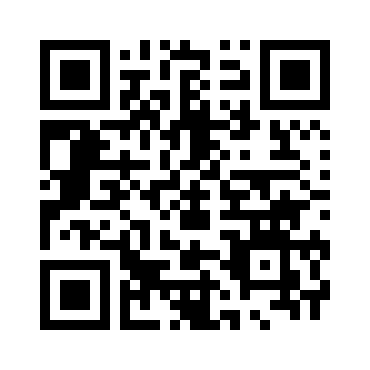

Encrypted data: 8vwxf58YJGRdUkbSRzndvrDE6xDYduvCDeTg6UjK44w=


In [17]:
# Generate the QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(enc_id)
qr.make(fit=True)

# Create and save the QR code image
img = qr.make_image(fill='black', back_color='white')
img.save("encrypted_qr_code.png")

# Optionally, show the image
img.show()

# The encrypted data (this is what is encoded in the QR code)
print("Encrypted data:", enc_id)